In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.integrate import cumulative_trapezoid, solve_ivp, trapezoid
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from field_functions import LaserField
import csv

class AU:
    meter = 5.2917720859e-11 # atomic unit of length in meters
    nm = 5.2917721e-2 # atomic unit of length in nanometres
    second = 2.418884328e-17 # atomic unit of time in seconds
    fs = 2.418884328e-2 # atomic unit of time in femtoseconds
    Joule = 4.359743935e-18 # atomic unit of energy in Joules
    eV = 27.21138383 # atomic unit of energy in electronvolts
    Volts_per_meter = 5.142206313e+11 # atomic unit of electric field in V/m
    Volts_per_Angstrom = 51.42206313 # atomic unit of electric field in V/Angström
    speed_of_light = 137.035999 # vacuum speed of light in atomic units
    Coulomb = 1.60217646e-19 # atomic unit of electric charge in Coulombs
    PW_per_cm2_au = 0.02849451308 # PW/cm^2 in atomic units
AtomicUnits=AU

def cos8Envelope(t, fwhm):
    return (np.cos(-t**2/ fwhm))**8

def extract_time(file_path):
    with open(file_path, 'r') as file:
        first_colomn = []
        for row, line in enumerate(file):
            if row < 6:
                continue
            line = line.strip()
            colomns = line.split()
            if len(colomns) >= 5:
                first_colomn.append(float(colomns[0]))
    return first_colomn

def extractField_0(file_path):
    with open(file_path, 'r') as file:
        fifth_colomn = []
        for row, line in enumerate(file):
            if row < 6:
                continue
            line = line.strip()
            colomns = line.split()
            if len(colomns) >= 5:
                fifth_colomn.append(float(colomns[5]))
    return fifth_colomn

# Laser dense

In [2]:
df_dense=pd.read_csv("/home/user/BachelorThesis/trecxcoefftests/tiptoe_dense/0013/expec", sep='\s+', header=8)
#shift every column name by one and remove the first column
df_dense.columns = df_dense.columns[1:].tolist() + [""]
#remove last column
df_dense = df_dense.iloc[:, :-1]




fig = go.Figure()
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(np.imag(c)), mode='lines', name='c^2_Occ_0'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["Re{<H0:0|psi>}"]), mode='lines', name='c^2_new'))
fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:1}>"]), mode='lines', name='c^2_Occ_1'))
fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:2}>"]), mode='lines', name='c^2_Occ_2'))
fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:3}>"]), mode='lines', name='c^2_Occ_3'))
fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:4}>"]), mode='lines', name='c^2_Occ_4'))
fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:5}>"]), mode='lines', name='c^2_Occ_5'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=1-(np.real(cumulative_integral_reduced)**2+np.imag(cumulative_integral_reduced)**2), mode='lines', name='c^2_analytical'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["Re{<H0:2|psi>}"]**2+df_dense["Imag{<H0:2|psi>}"]**2), mode='lines', name='c^2_new'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["Re{<H0:0|psi>}"]), mode='lines', name='c^2_new'))

tRecX outputs the coefficients in ordners of energy level, so $1s->2s->2p->3s->3p->4s->3d->...$. But we know that i.e. $1s->2s$ is forbidden, so $l$ needs to change. Thats why $c^2_3$ and $c^2_5$ are far below the others. $c^2_2$ and $c^2_4$ can both be accessed by a normal dipole transition However $c^2_1$ is normally not possible to access but nevertheless its propability is the highest because of multiphotonprocesses.

# Analytical coefficients

Analytical calculation of ground state coefficient compared to tRecX

In [3]:
time0 = extract_time("/home/user/BachelorThesis/trecxcoefftests/tiptoe_dense/0013/Laser")
field0 = extractField_0("/home/user/BachelorThesis/trecxcoefftests/tiptoe_dense/0013/Laser")

integrand = np.exp(1j* 1/2 * np.array(time0)) * np.array(field0) #* np.exp(-1j* 1/2 * np.array(time0)) #because of interaction representation
cumulative_integral = cumulative_trapezoid(-1j*integrand, x=np.array(time0), initial=0)
interp_func = interp1d(time0, cumulative_integral, kind='cubic', fill_value="extrapolate")
cumulative_integral_reduced = interp_func(df_dense["Time"]) #* np.exp(+1j* 1/4 * df_dense["Time"])

test = (df_dense["Re{<H0:0|psi>}"]+1j*df_dense["Imag{<H0:0|psi>}"])#* np.exp(-1j* 1/1 * df_dense["Time"])

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:1}>"]), mode='lines', name='c^2_Occ_new'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(np.imag(test)), mode='lines', name='c^2_Occ_new'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=1-(np.real(cumulative_integral_reduced)**2+np.imag(cumulative_integral_reduced)**2), mode='lines', name='c^2_analytical'))

#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.imag(cumulative_integral_reduced), mode='lines', name='c^2_analytical'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["Re{<H0:0|psi>}"])**2+np.array(df_dense["Imag{<H0:0|psi>}"])**2, mode='lines', name='c^2_Occ_new'))

WRONG!!
Physical measurements have to be the same in both schroedinger and interaction picture so $c^2$ has to be equal. When switching from schroedinger to interaction picture, the real part of the coefficients are zero, all the oszillation in the $c^2$ are in the imaginary part. However in the schroedinger picture both parts are giving an equal contribution to the propability amplitude. The schroedinger picture is somewhat more physically intuitive because at $t=0$ the propability amplitude of an electron sitting in ground state is at its lowest because the laser has its peak there. 
The coefficients in interaction picture are giving by $c_n^I(t)=e^{iE_nt}c_n(t)$.
The discrepancy between the two graphs is due to the fact that in the analytical calculation I assumed that the occupation of the ground state is approx $1$ and the occupation of the excited states is sufficiently small.

In [45]:
integral_of_field = cumulative_trapezoid(field0, time0, initial=0)

field_interp = interp1d(time0, integral_of_field, kind='cubic', fill_value="extrapolate")

def A(t):
    F = -field_interp(t)
    return np.array([[-1j*F, -1j*F*np.exp(-1j*t*0), -1j*F*np.exp(1j*t*0.25)],
                     [-1j*F*np.exp(1j*t*0), -1j*F, -1j*F*np.exp(1j*t*0.25)],
                     [-1j*F*np.exp(-1j*t*0.25), -1j*F*np.exp(-1j*t*0.25), -1j*F]])

y0 = np.array([1+0j, 0+0j, 0+0j])

def rhs(t, y):
    return A(t) @ y


sol = solve_ivp(rhs, [time0[0], time0[-1]], y0, t_eval=time0)
solution = sol.y*np.exp(-1j*1/6*sol.t)



fig = go.Figure()

#fig.add_trace(go.Scatter(x=np.array(time0), y=np.real(solution[1]), mode='lines', name='analytical'))
#fig.add_trace(go.Scatter(x=np.array(time0), y=np.abs(solution[0])**2, mode='lines', name='c_analytical'))
#fig.add_trace(go.Scatter(x=np.array(time0), y=np.abs(sol.y[2])**2, mode='lines', name='c^2_Occ_2'))

#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:1}>"]), mode='lines', name='c^2_Occ_0'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["Re{<H0:1|psi>}"]), mode='lines', name='c_trecx'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["Imag{<H0:1|psi>}"]), mode='lines', name='c_trecximag'))


coeff = np.array(df_dense["Re{<H0:2|psi>}"]) + 1j*np.array(df_dense["Imag{<H0:2|psi>}"])
coeffInteraction = coeff*np.exp(+1j*1/8*df_dense["Time"])

fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.real(coeffInteraction), mode='lines', name='trecx_schroedinger'))


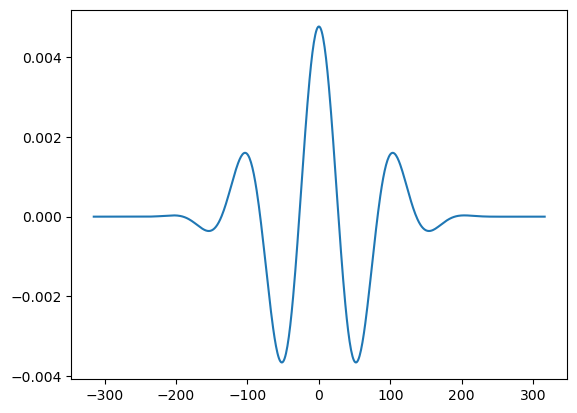

In [11]:
file_params = [
    #("850nm_350nm_1.25e+14", 850, 1.25e14, 350, 1e10, 0.93, 0, -np.pi/2),
    ("850nm_1e+11", 850, 8e11, 350, 8e11, 1, 0, -np.pi/2),
]

for file_name, lam0_pump, I_pump, lam0_probe, I_probe, FWHM_probe, cep_pump, cep_probe in file_params:
    laser_pulses = LaserField(cache_results=True)
    laser_pulses.add_pulse(lam0_pump, I_pump, cep_pump, lam0_pump/ AtomicUnits.nm / AtomicUnits.speed_of_light)
    t_min, t_max = laser_pulses.get_time_interval()
    time_recon= np.arange(t_min, t_max+1, 1)

plt.plot(time_recon, laser_pulses.Electric_Field(time_recon), label='Laser Field')
#plt.plot(time0, -cumulative_trapezoid(field0, time0, initial=0), label='Laser Field from file')

In [59]:
import numpy as np
from scipy.special import genlaguerre, sph_harm, factorial
from scipy.integrate import quad, solve_ivp
# import matplotlib.pyplot as plt # No longer needed for plotting
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Atomic Units are used throughout (hbar=1, m_e=1, e=1, a_0=1)

# --- Physical Laser Parameters (User Input) ---
lam0_pump_nm = 850.0  # nm
I_pump_W_cm2 = 8e11 # W/cm^2
cep_pump_rad = 0.0    # radians
num_cycles_pulse = 10 # Number of optical cycles for the FWHM or total duration of envelope

# --- Conversion Constants to Atomic Units ---
eV_to_Hartree = 1.0 / 27.21138602
# ... (rest of conversion constants are the same as before)
# Speed of light in vacuum (SI)
c_SI = 299792458.0  # m/s
# Vacuum permittivity (SI)
epsilon0_SI = 8.854187817e-12 # F/m
# Atomic unit of electric field (SI)
E_atomic_SI = 5.14220674763e11 # V/m


# --- Convert to Atomic Units ---
E_photon_eV = (1240.0 / lam0_pump_nm)
omega_laser_au = E_photon_eV * eV_to_Hartree
print(f"Laser omega: {omega_laser_au:.6f} a.u.")

I_pump_W_m2 = I_pump_W_cm2 * (100.0**2)
E0_field_SI = np.sqrt(2 * I_pump_W_m2 / (c_SI * epsilon0_SI))
E0_field_au = E0_field_SI / E_atomic_SI
print(f"Target peak E-field: {E0_field_au:.6f} a.u. (from I={I_pump_W_cm2:.1e} W/cm^2)")

cep_laser_au = cep_pump_rad
T_optical_cycle_au = 2 * np.pi / omega_laser_au
T_pulse_duration_au = num_cycles_pulse * T_optical_cycle_au
print(f"Optical cycle duration: {T_optical_cycle_au:.2f} a.u.")
print(f"Total pulse duration (envelope): {T_pulse_duration_au:.2f} a.u.")

# --- Parameters for the cos^N pulse ---
N_cos_envelope = 8
A0_vp_param = E0_field_au / omega_laser_au
tau_pulse_param = T_pulse_duration_au / 2.0
t_pulse_center = T_pulse_duration_au / 2.0

# --- Hydrogen Atom Basis States ---
class HydrogenState:
    def __init__(self, n, l, m):
        if not (n > 0 and 0 <= l < n and -l <= m <= l):
            raise ValueError("Invalid quantum numbers")
        self.n = n
        self.l = l
        self.m = m
    @property
    def energy(self): return -0.5 / (self.n**2)
    def __repr__(self): return f"|{self.n},{self.l},{self.m}>"
    def __eq__(self, other): return self.n == other.n and self.l == other.l and self.m == other.m
    def __hash__(self): return hash((self.n, self.l, self.m))

def R_nl_func(r, n, l):
    if l >= n: return np.zeros_like(r)
    coeff = np.sqrt((2.0/n)**3 * factorial(n-l-1) / (2.0*n*factorial(n+l)))
    laguerre_poly = genlaguerre(n-l-1, 2*l+1)
    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre_poly(2.0*r/n)

_radial_integral_cache = {}
def radial_integral_z(n1, l1, n2, l2):
    key = tuple(sorted(((n1, l1), (n2, l2))))
    if key in _radial_integral_cache: return _radial_integral_cache[key]
    integrand = lambda r: R_nl_func(r, n1, l1) * r * R_nl_func(r, n2, l2) * r**2
    max_n_involved = max(n1, n2)
    r_max_integration = 2.5 * max_n_involved**2 + 40
    if l1 >= n1 or l2 >= n2: return 0.0
    result, error = quad(integrand, 0, r_max_integration, limit=200, epsabs=1e-9, epsrel=1e-9)
    _radial_integral_cache[key] = result
    return result

def angular_integral_z(l1, m1, l2, m2):
    if m1 != m2: return 0.0
    if abs(l1 - l2) != 1: return 0.0
    if l1 == l2 + 1: l, m = l2, m2; return np.sqrt(((l+1)**2 - m**2) / ((2*l+1)*(2*l+3)))
    elif l1 == l2 - 1: l, m = l2, m2; return np.sqrt((l**2 - m**2) / ((2*l-1)*(2*l+1)))
    return 0.0

_z_matrix_element_cache = {}
def z_matrix_element(state1: HydrogenState, state2: HydrogenState):
    key = tuple(sorted((state1, state2), key=lambda s: (s.n, s.l, s.m)))
    if key in _z_matrix_element_cache: return _z_matrix_element_cache[key]
    if state1.m != state2.m: _z_matrix_element_cache[key] = 0.0; return 0.0
    rad_int = radial_integral_z(state1.n, state1.l, state2.n, state2.l)
    ang_int = angular_integral_z(state1.l, state1.m, state2.l, state2.m)
    result = rad_int * ang_int
    _z_matrix_element_cache[key] = result
    return result

def calculate_cosN_electric_field_value(t_shifted, A0_vp, w0, tau, cep, N_env):
    if abs(t_shifted) >= tau: return 0.0
    x_carrier_arg = w0 * t_shifted - cep
    y_envelope_arg = 0.5 * np.pi * t_shifted / tau
    cos_y = np.cos(y_envelope_arg)
    if abs(cos_y) < 1e-12: return 0.0
    sin_y = np.sin(y_envelope_arg)
    cos_x = np.cos(x_carrier_arg)
    sin_x = np.sin(x_carrier_arg)
    envelope_term = cos_y**(N_env - 1)
    term1_factor = w0 * cos_x * cos_y
    term2_factor = (N_env * np.pi * sin_x * sin_y) / (2. * tau)
    return A0_vp * envelope_term * (term1_factor - term2_factor)

def E_z_laser(t_sim):
    t_shifted = t_sim - t_pulse_center
    return calculate_cosN_electric_field_value(t_shifted, A0_vp_param, omega_laser_au, tau_pulse_param, cep_laser_au, N_cos_envelope)

# --- Basis Set ---
basis_states = []
max_n_basis = 3
for n_val in range(1, max_n_basis + 1):
    for l_val in range(n_val):
        m_val = 0
        basis_states.append(HydrogenState(n_val, l_val, m_val))
num_states = len(basis_states)
print(f"Basis states ({num_states}): {basis_states}")

E_j = np.array([s.energy for s in basis_states])
z_jk_matrix = np.zeros((num_states, num_states))
print("Calculating z matrix elements...")
for j, state_j in enumerate(basis_states):
    for k, state_k in enumerate(basis_states):
        if j <= k:
            val = z_matrix_element(state_j, state_k)
            z_jk_matrix[j, k] = val
            z_jk_matrix[k, j] = val
print("z matrix elements calculated.")

# --- 4. Coupled ODEs ---
def tdse_rhs(t, y_complex):
    c = y_complex[:-1]
    A_z_val = y_complex[-1].real
    dc_dt = np.zeros_like(c, dtype=np.complex128)
    E_field_t = E_z_laser(t)
    for k_idx in range(num_states):
        sum_val = 0.0j
        for n_idx in range(num_states):
            if k_idx == n_idx: continue
            z_kn = z_jk_matrix[k_idx, n_idx]
            if z_kn == 0: continue
            phase_factor = np.exp(1j * (E_j[k_idx] - E_j[n_idx]) * t)
            term = c[n_idx] * (E_j[k_idx] - E_j[n_idx]) * z_kn * phase_factor
            sum_val += term
        dc_dt[k_idx] = sum_val * A_z_val
    dA_z_dt = -E_field_t
    derivatives = np.append(dc_dt, dA_z_dt)
    return derivatives

# --- 5. Numerical Solution ---
s1_state = HydrogenState(1,0,0)
idx_1s = basis_states.index(s1_state)
c_initial = np.zeros(num_states, dtype=np.complex128)
c_initial[idx_1s] = 1.0 + 0.0j
A_z_initial = 0.0
y0_complex = np.append(c_initial, A_z_initial)

t_start = 0.0
t_end = T_pulse_duration_au * 1.2
num_t_points = int(max(500, T_pulse_duration_au / T_optical_cycle_au * 50))
t_eval_points = np.linspace(t_start, t_end, num_t_points*16)
print(f"Integrating from t=0 to t={t_end:.2f} a.u. with {num_t_points} points.")

print("Starting ODE integration...")
sol = solve_ivp(tdse_rhs, [t_start, t_end], y0_complex, t_eval=t_eval_points,
                method='RK45', rtol=1e-7, atol=1e-10) # Consider BDF or LSODA for long times if stiff
print("ODE integration finished.")

# --- Plotting Results with Plotly ---

# Plot 1: Populations |c_k(t)|^2
fig_pops = go.Figure()
for i in range(2, 3):#numStates
    fig_pops.add_trace(go.Scatter(x=sol.t, y=np.real(sol.y[i, :]),
                                  mode='lines',
                                  name=f'Pop. {basis_states[i]}'))

title_str_pops = (f"State Populations (cos<sup>{N_cos_envelope}</sup> pulse)<br>"
                  f"<i>I</i>={I_pump_W_cm2:.1e} W/cm<sup>2</sup> (<i>λ</i>={lam0_pump_nm:.0f} nm, "
                  f"<i>E</i><sub>0</sub>={E0_field_au:.4f} a.u., <i>ω<sub>L</sub></i>={omega_laser_au:.4f} a.u.)<br>"
                  f"<i>T<sub>p</sub></i>={T_pulse_duration_au:.1f} a.u. ({num_cycles_pulse} cycles), CEP={cep_laser_au:.1f}")

fig_pops.update_layout(
    title=title_str_pops,
    xaxis_title="Time (atomic units)",
    yaxis_title="Population |c<sub>k</sub>(t)|<sup>2</sup>",
    #yaxis_range=[-0.02, 1.05],
    legend_title="States",
    hovermode="x unified"
)
fig_pops.show()


# # Plot 2: A_z(t) and E_z(t)
# A_z_t = sol.y[-1, :].real
# E_z_t_plot = np.array([E_z_laser(ti) for ti in sol.t])

# fig_fields = make_subplots(specs=[[{"secondary_y": True}]])

# # Add A_z(t) trace
# fig_fields.add_trace(
#     go.Scatter(x=sol.t, y=A_z_t, name="A<sub>z</sub>(t)", line=dict(color='red')),
#     secondary_y=False,
# )

# # Add E_z(t) trace
# fig_fields.add_trace(
#     go.Scatter(x=sol.t, y=E_z_t_plot, name="E<sub>z</sub>(t)", line=dict(color='blue', dash='dash')),
#     secondary_y=True,
# )

# # Add vertical line for pulse duration
# fig_fields.add_vline(x=T_pulse_duration_au, line_width=1, line_dash="dash", line_color="grey",
#                      annotation_text=f"End of env. (T<sub>p</sub>={T_pulse_duration_au:.1f})",
#                      annotation_position="top left")


# fig_fields.update_layout(
#     title_text="Vector Potential A<sub>z</sub>(t) and Electric Field E<sub>z</sub>(t)",
#     hovermode="x unified"
# )

# fig_fields.update_xaxes(title_text="Time (atomic units)")
# fig_fields.update_yaxes(title_text="<b>A<sub>z</sub>(t)</b> (a.u.)", color='red', secondary_y=False)
# fig_fields.update_yaxes(title_text="<b>E<sub>z</sub>(t)</b> (a.u.)", color='blue', secondary_y=True)

# fig_fields.show()


# # --- Print Final Info ---
# total_prob = np.sum(np.abs(sol.y[:-1, :])**2, axis=0)
# print(f"Min total probability: {np.min(total_prob):.6f}")
# print(f"Max total probability: {np.max(total_prob):.6f}")
# print("\nFinal Populations (at t_end):")
# for i in range(num_states):
#     print(f"State {basis_states[i]}: {np.abs(sol.y[i, -1])**2:.4e}")

# times_for_E_peak_check = np.linspace(0, T_pulse_duration_au, 2000)
# E_values_for_check = np.array([E_z_laser(t) for t in times_for_E_peak_check])
# actual_peak_E = np.max(np.abs(E_values_for_check))
# print(f"\nTarget peak E-field (E0_field_au from intensity): {E0_field_au:.6f} a.u.")
# print(f"Actual peak E-field from E_z_laser(t) formula: {actual_peak_E:.6f} a.u.")
# print(f"(Using A0_vp_param = E0_field_au / omega_laser_au = {A0_vp_param:.6f} a.u.)")
# if not np.isclose(E0_field_au, actual_peak_E, rtol=0.05):
#     print("Note: Actual peak E-field from formula can differ from target E-field derived from intensity.")
#     print("This is because the E(t) formula's peak depends on A0_vp, w0, N, and tau.")
#     print("For precise peak E-field, A0_vp_param might need calibration.")

fig = go.Figure()

coeff = np.array(df_dense["Re{<H0:2|psi>}"]) + 1j*np.array(df_dense["Imag{<H0:2|psi>}"])
coeffInteraction = coeff*np.exp(+1j*1/2*df_dense["Time"])
fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.real(coeffInteraction), mode='lines', name='trecx_schroedinger'))

Laser omega: 0.053611 a.u.
Target peak E-field: 0.004774 a.u. (from I=8.0e+11 W/cm^2)
Optical cycle duration: 117.20 a.u.
Total pulse duration (envelope): 1172.00 a.u.
Basis states (6): [|1,0,0>, |2,0,0>, |2,1,0>, |3,0,0>, |3,1,0>, |3,2,0>]
Calculating z matrix elements...
z matrix elements calculated.
Integrating from t=0 to t=1406.40 a.u. with 500 points.
Starting ODE integration...
ODE integration finished.
